In [ ]:
import ecco
import japanize_matplotlib

In [ ]:
def ecco_gen(text, model='rinna/japanese-gpt-1b', generate=30):
    model_config = {
        'embedding': "transformer.wte.weight",
        'type': 'causal',
        'activations': ['mlp\.c_proj'],
        "token_prefix": "_",
        "partial_token_prefix": "",
    }
    lm = ecco.from_pretrained(model, model_config=model_config)
    output = lm.generate(text, generate=generate, do_sample=True)
    return output

In [22]:
(output := ecco_gen("中国の首都は北京。アメリカの首都はワシントン。日本の首都は", model="rinna/japanese-gpt2-medium", generate=2))

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
output.layer_predictions(position=15)

<IPython.core.display.Javascript object>

In [25]:
output.layer_predictions(position=14, layer=5)

<IPython.core.display.Javascript object>

posx and posy should be finite values


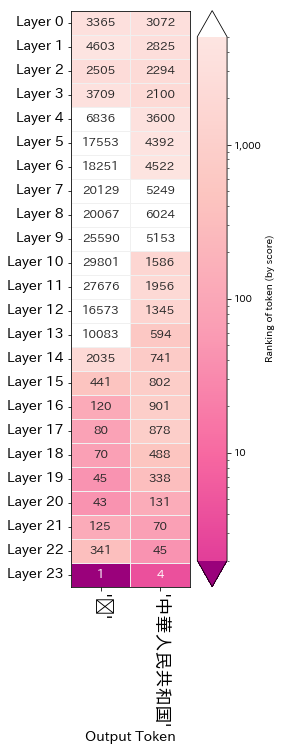

In [26]:
output.rankings()

posx and posy should be finite values


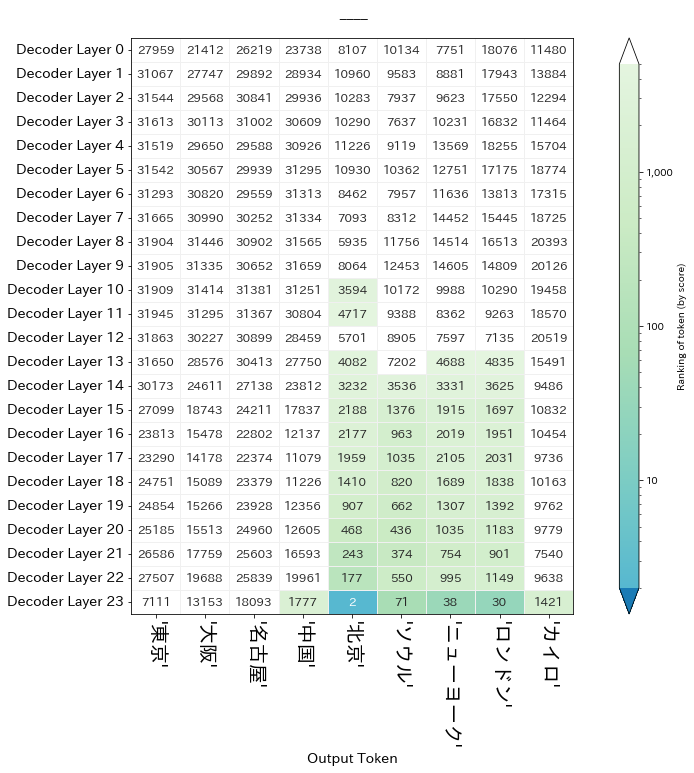

In [30]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("rinna/japanese-gpt2-medium")

output.rankings_watch(
    [
        tokenizer.vocab["東京"],
        tokenizer.vocab["大阪"],
        tokenizer.vocab["名古屋"],
        tokenizer.vocab["中国"],
        tokenizer.vocab["北京"],
        tokenizer.vocab["ソウル"],
        tokenizer.vocab["ニューヨーク"],
        tokenizer.vocab["ロンドン"],
        tokenizer.vocab["カイロ"],
    ]
)